In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris target: ")
print(iris.target)

Iris target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
import sys
import numpy as np
from sklearn import metrics
from scipy.spatial import distance

class AgglomerativeClustering():

    def __init__(self, n_cluster = 1, linkage = "single"):
        self.n_cluster = n_cluster
        self.linkage = linkage

    def init_distance_matrix(self, size):
        self.init_distance_matrix = [[0 for x in range(0, size)] for y in range(0, size)] 
        self.distance_matrix = [[0 for x in range(0, size)] for y in range(0, size)]
        for i in range (0, size - 1):
            for j in range (i + 1, size):
                self.init_distance_matrix[i][j] = distance.cdist(np.array([self.data[i]]), np.array([self.data[j]]), 'euclidean')

    def clustering(self, size): 
        min = sys.maxsize
        idx_min_x = 0
        idx_min_y = 0
        # pengisian distance matrix dan pencarian jarak minimum
        for i in range (0, size - 1):
            for j in range (i + 1, size):
                if self.linkage == "single":
                    self.distance_matrix[i][j] = self.calculate_single_distance(self.idx_clusters[i], self.idx_clusters[j])
                elif self.linkage == "complete":
                    self.distance_matrix[i][j] = self.calculate_complete_distance(self.idx_clusters[i], self.idx_clusters[j])
                elif self.linkage == "average":
                    self.distance_matrix[i][j] = self.calculate_average_distance(self.idx_clusters[i], self.idx_clusters[j])
                elif self.linkage == "average_group":
                    self.distance_matrix[i][j] = self.calculate_average_group_distance(self.clusters[i], self.clusters[j])
                if self.distance_matrix[i][j] < min:
                    min = self.distance_matrix[i][j]
                    idx_min_x = i
                    idx_min_y = j
        # penggabungan 2 cluster yang memiliki jarak minimum
        temp_cluster_value = self.clusters.pop(idx_min_y)
        temp_idx_value = self.idx_clusters.pop(idx_min_y)
        for index_cluster in range (0, len(temp_cluster_value)):
            self.clusters[idx_min_x].append(temp_cluster_value[index_cluster])
        for index_cluster in range (0, len(temp_idx_value)):
            self.idx_clusters[idx_min_x].append(temp_idx_value[index_cluster])

    def calculate_single_distance(self, cluster1, cluster2):
        min = sys.maxsize
        for i in range (0, len(cluster1)):
            for j in range (0, len(cluster2)):
                if cluster1[i] < cluster2[j]:
                    if self.init_distance_matrix[cluster1[i]][cluster2[j]] < min :
                        min = self.init_distance_matrix[cluster1[i]][cluster2[j]]
                else:
                    if self.init_distance_matrix[cluster2[j]][cluster1[i]] < min :
                        min = self.init_distance_matrix[cluster2[j]][cluster1[i]]
        return min

    def calculate_complete_distance(self, cluster1, cluster2):
        max = 0
        for i in range (0, len(cluster1)):
            for j in range (0, len(cluster2)):
                if cluster1[i] < cluster2[j]:
                    if self.init_distance_matrix[cluster1[i]][cluster2[j]] > max :
                        max = self.init_distance_matrix[cluster1[i]][cluster2[j]]
                else:
                    if self.init_distance_matrix[cluster2[j]][cluster1[i]] > max :
                        max = self.init_distance_matrix[cluster2[j]][cluster1[i]]
        return max

    def calculate_average_group_distance(self, cluster1, cluster2):
        temp_cluster1 = []
        temp_cluster2 = []
        for j in range (0, len(cluster1[0])):
            value = 0
            for i in range (0, len(cluster1)):
                value += cluster1[i][j]
            temp_cluster1.append(value / len(cluster1))
        for j in range (0, len(cluster2[0])):
            value = 0
            for i in range (0, len(cluster2)):
                value += cluster2[i][j]
            temp_cluster2.append(value / len(cluster2))
        return distance.cdist(np.array([temp_cluster1]), np.array([temp_cluster2]), 'euclidean')

    def calculate_average_distance(self, cluster1, cluster2):
        value = 0
        count = 0
        for i in range (0, len(cluster1)):
            for j in range (0, len(cluster2)):
                if cluster1[i] < cluster2[j]:
                    value += self.init_distance_matrix[cluster1[i]][cluster2[j]]
                else:
                    value += self.init_distance_matrix[cluster2[j]][cluster1[i]]
                count += 1
        return (value / count)

    def init_cluster(self, data):
        self.clusters = [[] for i in range(len(self.data))]
        self.idx_clusters = [[] for i in range(len(self.data))]
        for i in range (0, len(self.data)):
            self.clusters[i].append(self.data[i])
            self.idx_clusters[i].append(i)

    def fit(self, X):
        self.data = X
        self.init_cluster(self.data)
        size = len(self.data)
        self.init_distance_matrix(size)
        while (size > self.n_cluster):
            self.clustering(size)
            size -= 1
        self.create_labels()

    def create_labels(self):
        self.labels = [None] * len(self.data)
        for i in range(0, len(self.idx_clusters)):
            for j in range(0, len(self.idx_clusters[i])):
                self.labels[self.idx_clusters[i][j]] = i
        self.labels = np.array(self.labels)

    def purity_score(self, y_true):
        contingency_matrix = metrics.cluster.contingency_matrix(y_true, self.labels)
        print(contingency_matrix)
        return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

Hasil clustering implementasi Agglomerative Hierarchical single linkage
[0, 17, 40, 4, 37, 7, 39, 49, 27, 28, 35, 10, 48, 23, 26, 43, 1, 9, 34, 45, 12, 29, 30, 25, 2, 3, 47, 8, 38, 42, 11, 6, 19, 21, 46, 13, 24, 36, 20, 31, 5, 18, 16, 32, 33, 44, 15, 14, 22, 41] 

[50, 52, 86, 51, 56, 54, 58, 65, 75, 74, 97, 77, 76, 71, 53, 89, 69, 80, 81, 67, 82, 92, 88, 94, 95, 96, 99, 90, 61, 55, 66, 84, 63, 91, 78, 73, 79, 85, 59, 70, 127, 138, 123, 126, 146, 149, 101, 142, 113, 121, 72, 83, 133, 103, 116, 137, 104, 128, 132, 110, 147, 111, 141, 145, 112, 139, 120, 143, 140, 144, 124, 115, 136, 148, 102, 125, 129, 64, 100, 119, 107, 130, 114, 62, 68, 87, 105, 122, 118, 135, 134, 108, 109, 57, 93, 60, 98, 106] 

[117, 131] 

Label hasil clustering implementasi Agglomerative Hierarchical single linkage
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

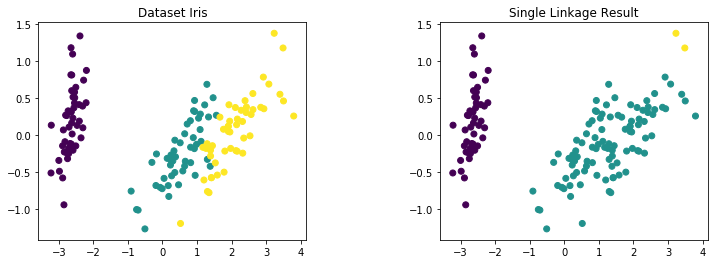

In [13]:
a1 = AgglomerativeClustering(n_cluster = 3, linkage = "single")
a1.fit(iris.data)
print("Hasil clustering implementasi Agglomerative Hierarchical single linkage")
for i in range(0, 3):
    print(a1.idx_clusters[i], "\n")
print("Label hasil clustering implementasi Agglomerative Hierarchical single linkage")
print(a1.labels, "\n")
print("Purity:", a1.purity_score(iris.target), "\n")

fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=iris.target)
plt.title("Dataset Iris")
plt.subplot(1, 2, 2)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=a1.labels)
plt.title("Single Linkage Result")
plt.show()

Hasil clustering implementasi Agglomerative Hierarchical complete linkage
[0, 17, 40, 7, 39, 49, 27, 28, 4, 37, 35, 1, 45, 12, 9, 34, 25, 29, 30, 2, 3, 47, 42, 6, 8, 38, 13, 22, 41, 5, 18, 10, 48, 36, 20, 31, 11, 24, 23, 26, 43, 19, 21, 46, 44, 14, 15, 16, 32, 33] 

[50, 52, 86, 77, 54, 58, 76, 65, 75, 51, 56, 85, 63, 91, 78, 73, 74, 97, 68, 87, 119, 70, 127, 138, 149, 101, 142, 113, 121, 114, 72, 83, 133, 123, 126, 111, 146, 134, 100, 136, 148, 120, 143, 124, 140, 144, 103, 116, 137, 104, 128, 132, 108, 110, 147, 115, 112, 139, 141, 145, 102, 125, 129, 107, 130, 105, 122, 118, 109, 135, 117, 131] 

[53, 89, 69, 80, 81, 59, 64, 79, 62, 55, 90, 66, 84, 61, 71, 67, 82, 92, 88, 95, 96, 94, 99, 106, 57, 93, 98, 60] 

Label hasil clustering implementasi Agglomerative Hierarchical complete linkage
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 

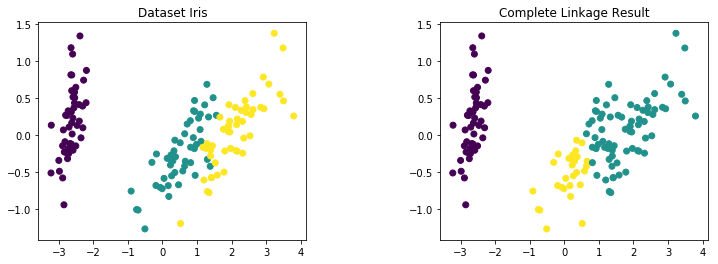

In [14]:
a2 = AgglomerativeClustering(n_cluster = 3, linkage = "complete")
a2.fit(iris.data)
print("Hasil clustering implementasi Agglomerative Hierarchical complete linkage")
for i in range(0, 3):
    print(a2.idx_clusters[i], "\n")
print("Label hasil clustering implementasi Agglomerative Hierarchical complete linkage")
print(a2.labels, "\n")
print("Purity:", a2.purity_score(iris.target), "\n")
# contingency_matrix = metrics.cluster.contingency_matrix(iris.target, a2.labels)
# print(contingency_matrix)

fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=iris.target)
plt.title("Dataset Iris")
plt.subplot(1, 2, 2)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=a2.labels)
plt.title("Complete Linkage Result")
plt.show()

Hasil clustering implementasi Agglomerative Hierarchical average linkage
[0, 17, 40, 27, 28, 7, 39, 49, 4, 37, 35, 23, 26, 43, 20, 31, 36, 5, 18, 10, 48, 19, 21, 46, 16, 44, 1, 45, 12, 9, 34, 25, 2, 3, 47, 29, 30, 6, 11, 24, 8, 38, 42, 13, 22, 14, 15, 32, 33, 41] 

[50, 52, 86, 76, 77, 54, 58, 65, 75, 51, 56, 85, 63, 91, 78, 73, 71, 74, 97, 68, 87, 119, 70, 127, 138, 149, 72, 83, 133, 123, 126, 146, 101, 142, 113, 121, 114, 53, 89, 69, 80, 81, 59, 64, 79, 55, 90, 66, 84, 61, 88, 95, 96, 94, 99, 67, 82, 92, 62, 106, 57, 93, 98, 60] 

[100, 120, 143, 140, 144, 124, 115, 136, 148, 103, 116, 137, 111, 104, 128, 132, 110, 147, 112, 139, 141, 145, 108, 134, 102, 125, 129, 107, 130, 135, 105, 122, 118, 109, 117, 131] 

Label hasil clustering implementasi Agglomerative Hierarchical average linkage
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

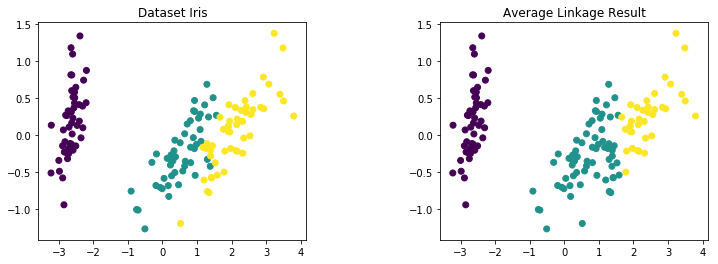

In [15]:
a3 = AgglomerativeClustering(n_cluster = 3, linkage = "average")
a3.fit(iris.data)
print("Hasil clustering implementasi Agglomerative Hierarchical average linkage")
for i in range(0, 3):
    print(a3.idx_clusters[i], "\n")
print("Label hasil clustering implementasi Agglomerative Hierarchical average linkage")
print(a3.labels, "\n")
print("Purity:", a3.purity_score(iris.target),"\n")

fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=iris.target)
plt.title("Dataset Iris")
plt.subplot(1, 2, 2)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=a3.labels)
plt.title("Average Linkage Result")
plt.show()

Hasil clustering implementasi Agglomerative Hierarchical average group linkage
[0, 17, 27, 28, 7, 39, 49, 40, 4, 37, 10, 48, 19, 21, 46, 20, 31, 36, 23, 26, 43, 44, 1, 45, 12, 9, 34, 25, 29, 30, 2, 3, 47, 6, 35, 11, 24, 8, 38, 42, 13, 22, 5, 18, 16, 32, 33, 14, 15, 41] 

[50, 52, 86, 76, 77, 54, 58, 65, 75, 51, 56, 85, 63, 91, 78, 73, 71, 74, 97, 70, 127, 138, 149, 72, 83, 133, 123, 126, 146, 101, 142, 113, 121, 114, 68, 87, 119, 53, 89, 69, 80, 81, 64, 79, 59, 55, 90, 67, 82, 92, 88, 95, 96, 94, 99, 61, 66, 84, 62, 106, 57, 93, 98, 60] 

[100, 103, 116, 137, 111, 104, 128, 132, 110, 147, 112, 139, 141, 145, 120, 143, 140, 144, 124, 115, 136, 148, 108, 134, 102, 125, 129, 107, 130, 135, 105, 122, 118, 109, 117, 131] 

Label hasil clustering implementasi Agglomerative Hierarchical average group linkage
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

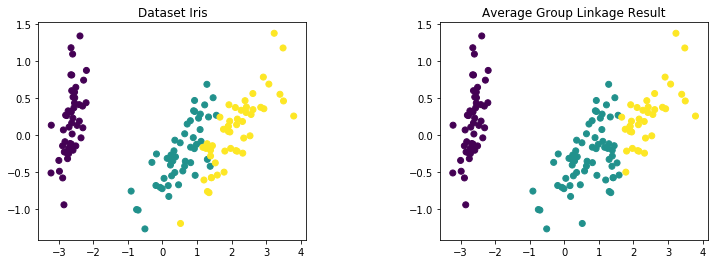

In [16]:
a4 = AgglomerativeClustering(n_cluster = 3, linkage = "average_group")
a4.fit(iris.data)
print("Hasil clustering implementasi Agglomerative Hierarchical average group linkage")
for i in range(0, 3):
    print(a4.idx_clusters[i], "\n")
print("Label hasil clustering implementasi Agglomerative Hierarchical average group linkage")
print(a4.labels, "\n")
print("Purity:", a4.purity_score(iris.target), "\n")

fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=iris.target)
plt.title("Dataset Iris")
plt.subplot(1, 2, 2)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=a4.labels)
plt.title("Average Group Linkage Result")
plt.show()